In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [3]:
import pandas as pd
data = pd.read_csv('Diabetes Database.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = data.copy()

In [5]:
def check_df(dataframe):
    #print("##################### Shape #####################")
    print(dataframe.shape)
    #print("##################### Types #####################")
    print(dataframe.dtypes)
    #print("##################### Head #####################")
    print(dataframe.head())
    #print("##################### Tail #####################")
    print(dataframe.tail())
    #print("##################### NA #####################")
    print(dataframe.isnull().sum())
    #print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
     Pregnancies  Glucose  ...  Age  Outcome
763           10      101  ...   63        0
764            2      122  ...   27  

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000



Exploratory Data Analysis

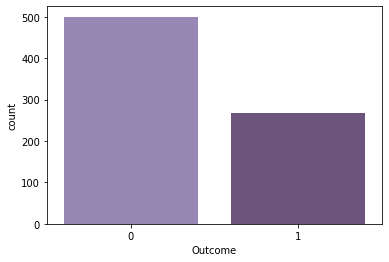

In [8]:
sns.countplot(x ='Outcome',data = df, palette=('BuPu_d'))

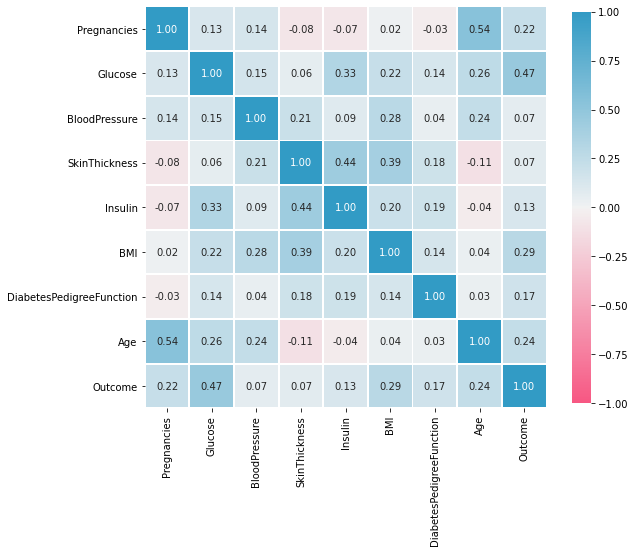

In [9]:
plt.figure(figsize=(9,9))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1,  cbar_kws={"shrink": .8}, square=True, annot=True, fmt='.2f',linewidths=.8)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

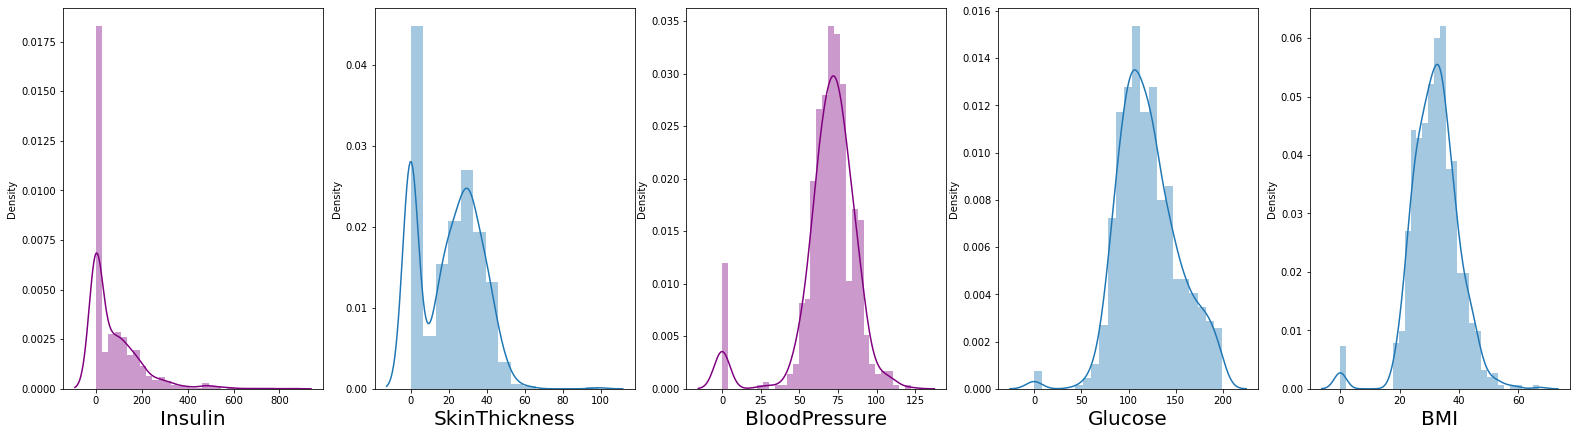

In [10]:
def column_dplots():

    f,ax=plt.subplots(1,5,figsize=(27,7))
    
    ax[0].set_xlabel('Insulin',fontsize=20)
    sns.distplot(df.Insulin, ax = ax[0], color= "purple")
    ax[1].set_xlabel('SkinThickness',fontsize=20)
    sns.distplot(df.SkinThickness,ax=ax[1])
    ax[2].set_xlabel('BloodPressure',fontsize=20)
    sns.distplot(df.BloodPressure, ax=ax[2],color= "purple")
    ax[3].set_xlabel('Glucose',fontsize=20)
    sns.distplot(df.Glucose, ax=ax[3])
    ax[4].set_xlabel('BMI',fontsize=20)
    sns.distplot(df.BMI, ax=ax[4])


    plt.show()

column_dplots()

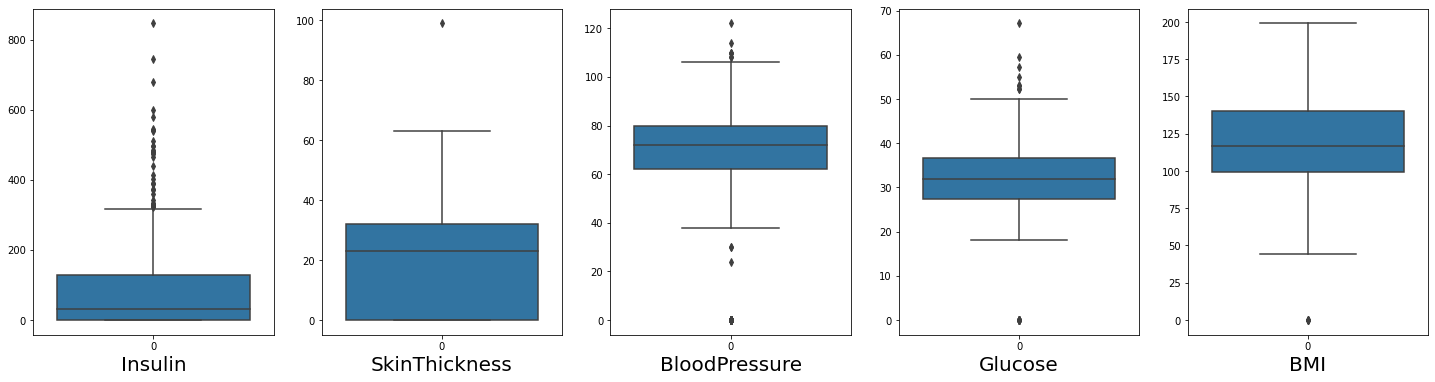

In [11]:
def outlier_plots():

    f,ax=plt.subplots(1,5,figsize=(25,6))
    sns.boxplot(data=df.Insulin, ax=ax[0]) 
    ax[0].set_xlabel('Insulin',fontsize=20)
    sns.boxplot(data=df.SkinThickness,ax=ax[1])
    ax[1].set_xlabel('SkinThickness',fontsize=20)
    sns.boxplot(data=df.BloodPressure, ax=ax[2])
    ax[2].set_xlabel('BloodPressure',fontsize=20)
    sns.boxplot(data=df.BMI, ax=ax[3])
    ax[3].set_xlabel('Glucose',fontsize=20)
    sns.boxplot(data=df.Glucose, ax=ax[4])
    ax[4].set_xlabel('BMI',fontsize=20)
    plt.show()

outlier_plots()

Data Pre-processing

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print(f" categoric: {cat_cols}, cat_but_car: {cat_but_car}, numeric: {num_cols}, num_but_cat: {num_but_cat}")
    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols, num_but_cat

In [13]:
grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
 categoric: ['Outcome'], cat_but_car: [], numeric: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], num_but_cat: ['Outcome']


(['Outcome'],
 [],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 ['Outcome'])

In [14]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
 categoric: ['Outcome'], cat_but_car: [], numeric: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], num_but_cat: ['Outcome']


In [16]:
import numpy as np

zero_list = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

[df[col].replace(0,np.NaN,inplace=True) for col in df[zero_list]]

[None, None, None, None, None]

In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.mean())
df.Insulin = df.Insulin.fillna(df.Insulin.median())
df.Glucose = df.Glucose.fillna(df.Glucose.mean())


In [19]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df[["BMI","SkinThickness"]] = imputer.fit_transform(df[["BMI","SkinThickness"]])

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,16.8,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,28.6,125.0,30.1,0.349,47,1


In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

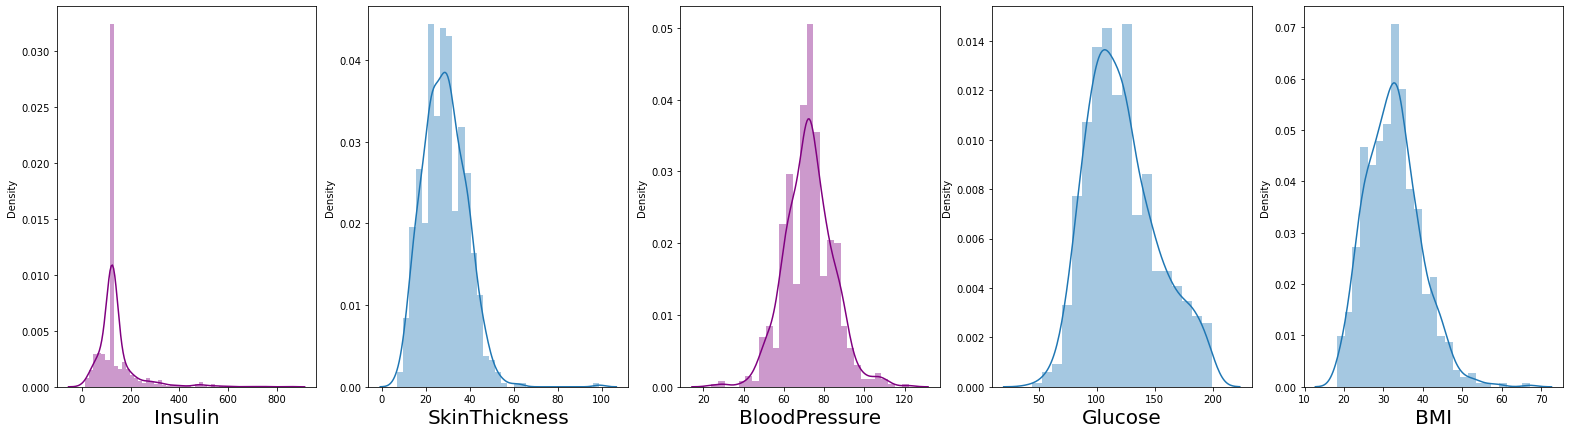

In [22]:
def column_dplots():

    f,ax=plt.subplots(1,5,figsize=(27,7))
    
    ax[0].set_xlabel('Insulin',fontsize=20)
    sns.distplot(df.Insulin, ax = ax[0], color= "purple")
    ax[1].set_xlabel('SkinThickness',fontsize=20)
    sns.distplot(df.SkinThickness,ax=ax[1])
    ax[2].set_xlabel('BloodPressure',fontsize=20)
    sns.distplot(df.BloodPressure, ax=ax[2],color= "purple")
    ax[3].set_xlabel('Glucose',fontsize=20)
    sns.distplot(df.Glucose, ax=ax[3])
    ax[4].set_xlabel('BMI',fontsize=20)
    sns.distplot(df.BMI, ax=ax[4])


    plt.show()

column_dplots()

In [23]:
def outlier_analysis(dataframe, numerical_columns):

    '''
    Outlier Analysis of the numerical columns
    '''
    df_without_outliers = dataframe.copy()
    outlier_boundries_dict = {}
    for col in numerical_columns:
            print(f"-----{col}------")
            lower_limit = dataframe[col].quantile(q=0.01)
            upper_limit = dataframe[col].quantile(q=0.99)

            number_of_outliers = len(dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)])
            if number_of_outliers>0:
                print(f"{number_of_outliers} outliers are found for {col} feature. \n")
            # outlier_boundries_dict[col] = (lower_limit,upper_limit)
            outlier_boundries_dict.update({col:(lower_limit,upper_limit)})

            df_without_outliers.loc[df[col]<lower_limit, col] = lower_limit
            df_without_outliers.loc[df[col]>upper_limit, col] = upper_limit
    
    return df_without_outliers, outlier_boundries_dict

In [ ]:
outlier_analysis(df,num_cols)

-----Pregnancies------
4 outliers are found for Pregnancies feature. 

-----Glucose------
14 outliers are found for Glucose feature. 

-----BloodPressure------
12 outliers are found for BloodPressure feature. 

-----SkinThickness------
12 outliers are found for SkinThickness feature. 

-----Insulin------
16 outliers are found for Insulin feature. 

-----BMI------
15 outliers are found for BMI feature. 

-----DiabetesPedigreeFunction------
16 outliers are found for DiabetesPedigreeFunction feature. 

-----Age------
6 outliers are found for Age feature. 



(     Pregnancies  Glucose  ...   Age  Outcome
 0            6.0    148.0  ...  50.0        1
 1            1.0     85.0  ...  31.0        0
 2            8.0    183.0  ...  32.0        1
 3            1.0     89.0  ...  21.0        0
 4            0.0    137.0  ...  33.0        1
 ..           ...      ...  ...   ...      ...
 763         10.0    101.0  ...  63.0        0
 764          2.0    122.0  ...  27.0        0
 765          5.0    121.0  ...  30.0        0
 766          1.0    126.0  ...  47.0        1
 767          1.0     93.0  ...  23.0        0
 
 [768 rows x 9 columns],
 {'Age': (21.0, 67.0),
  'BMI': (19.5, 50.75900000000009),
  'BloodPressure': (44.0, 106.0),
  'DiabetesPedigreeFunction': (0.09467999999999999, 1.6983300000000001),
  'Glucose': (67.67, 196.0),
  'Insulin': (24.340000000000003, 519.9000000000012),
  'Pregnancies': (0.0, 13.0),
  'SkinThickness': (10.0, 51.33000000000004)})

In [24]:
lower_limit = df["SkinThickness"].quantile(q=0.0)
upper_limit = df["SkinThickness"].quantile(q=0.999)
number_of_outliers = len(df[(df["SkinThickness"] < lower_limit) | (df["SkinThickness"] > upper_limit)])

print(lower_limit)
print(upper_limit)
f"{number_of_outliers}"

7.0
71.3880000000022


'1'

In [25]:
df = df[~((df["SkinThickness"] < lower_limit) | (df["SkinThickness"] > upper_limit))]

FEATURE ENGINEERING 

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,16.8,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,28.6,125.0,30.1,0.349,47,1


In [27]:
df.loc[df['Age'] <= 18, 'AGE_CAT'] = 'Kid'
df.loc[((df['Age'] <= 30) & (df['Age'] > 18)), 'AGE_CAT'] = 'Young'
df.loc[(df['Age'] > 30) & (df['Age'] < 50), 'AGE_CAT'] = 'Mature'
df.loc[df['Age'] >= 50, 'AGE_CAT'] = 'Senior'

df.AGE_CAT.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

Young     417
Mature    262
Senior     88
Name: AGE_CAT, dtype: int64

In [28]:
df.loc[(df['Glucose'] <= 70), 'GLUCOSE_CAT'] = 'HIPOGLISEMI'
df.loc[(df['Glucose'] <= 100) & (df['Glucose'] > 70), 'GLUCOSE_CAT'] = 'NORMAL'
df.loc[(df['Glucose'] <= 125) & (df['Glucose'] > 100), 'GLUCOSE_CAT'] = 'PREDIABETES'
df.loc[(df['Glucose'] > 125), 'GLUCOSE_CAT'] = 'DIABETES'

df.GLUCOSE_CAT.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

DIABETES       296
PREDIABETES    262
NORMAL         198
HIPOGLISEMI     11
Name: GLUCOSE_CAT, dtype: int64

In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AGE_CAT,GLUCOSE_CAT
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Senior,DIABETES
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Mature,NORMAL
2,8,183.0,64.0,16.8,125.0,23.3,0.672,32,1,Mature,DIABETES
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young,NORMAL
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Mature,DIABETES
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Senior,PREDIABETES
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0,Young,PREDIABETES
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Young,PREDIABETES
766,1,126.0,60.0,28.6,125.0,30.1,0.349,47,1,Mature,DIABETES


In [30]:
for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [31]:
df["AGE_CAT"].value_counts()

Young     417
Mature    262
Senior     88
Name: AGE_CAT, dtype: int64

In [33]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [34]:
df = one_hot_encoder(df,["AGE_CAT","GLUCOSE_CAT"])

Model Fitting

In [35]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [37]:
cart_params = {'max_depth': range(1, 10),
               "min_samples_split": [3, 4]}

In [38]:
cart_model = DecisionTreeClassifier(random_state=17)

cart_cv = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=True)
cart_cv.fit(X_train, y_train)

cart_cv.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.4s finished


{'max_depth': 4, 'min_samples_split': 3}

In [39]:
cart_tuned = DecisionTreeClassifier(**cart_cv.best_params_).fit(X_train, y_train)

In [40]:
xgb = XGBClassifier(n_estimators=500)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

f"XGBoost's prediction accuracy is: {acc_xgb}"

"XGBoost's prediction accuracy is: 75.32467532467533"

In [41]:
y_pred = cart_tuned.predict(X_test)
y_prob = cart_tuned.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       104
           1       0.57      0.72      0.64        50

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.73      0.74       154



0.8325961538461538

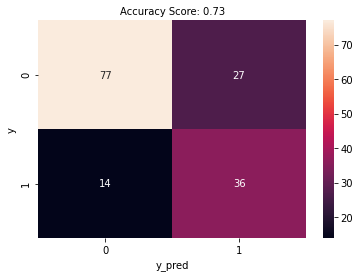

In [42]:
def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       104
           1       0.57      0.72      0.64        50

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.73      0.74       154



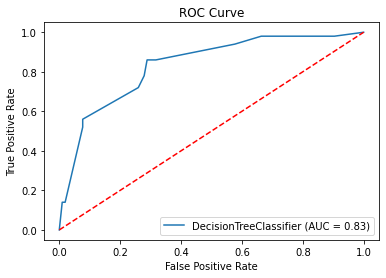

In [44]:
plot_roc_curve(cart_tuned, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()